# Predicting used car prices

In [1]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

## Import dataset

In [3]:
data = pd.read_csv(r"C:\Users\manit\OneDrive\Documents\GitHub\used-vehicle-price-prediction-data-science\dataset.csv")
data.sample(5)

Unnamed: 0                                     Name   Location  Year  \
2679        2679                   Honda Mobilio E i VTEC    Kolkata  2014   
4900        4900  Hyundai Santro Xing XL AT eRLX Euro III  Hyderabad  2007   
4276        4276                        Maruti Ertiga VDI    Kolkata  2014   
5602        5602    Toyota Innova 2.5 G (Diesel) 8 Seater  Hyderabad  2016   
409          409           Audi Q3 35 TDI Quattro Premium      Kochi  2017   

      Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
2679              23000    Petrol       Manual      First   17.3 kmpl   
4900              71000    Petrol    Automatic      First   17.0 kmpl   
4276              45617    Diesel       Manual      First  20.77 kmpl   
5602              81424    Diesel       Manual      First  12.99 kmpl   
409               37542    Diesel    Automatic      First  15.73 kmpl   

       Engine       Power  Seats New_Price  Price  
2679  1497 CC   117.3 bhp    7.0       NaN   4.25  
4900  1086 CC    null bhp    5.0       NaN   2.40  
4276  1248 CC   88.76 bhp    7.0       NaN   5.85  
5602  2494 CC   100.6 bhp    8.0       NaN  14.49  
409   1968 CC  174.33 bhp    5.0       NaN  25.71

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


* most of the column dataTypes are 'object' dataTypes
* we will extract the info and convert it to required dataTypes

In [6]:
data.shape

(6019, 14)

## Data Cleaning

<Axes: >

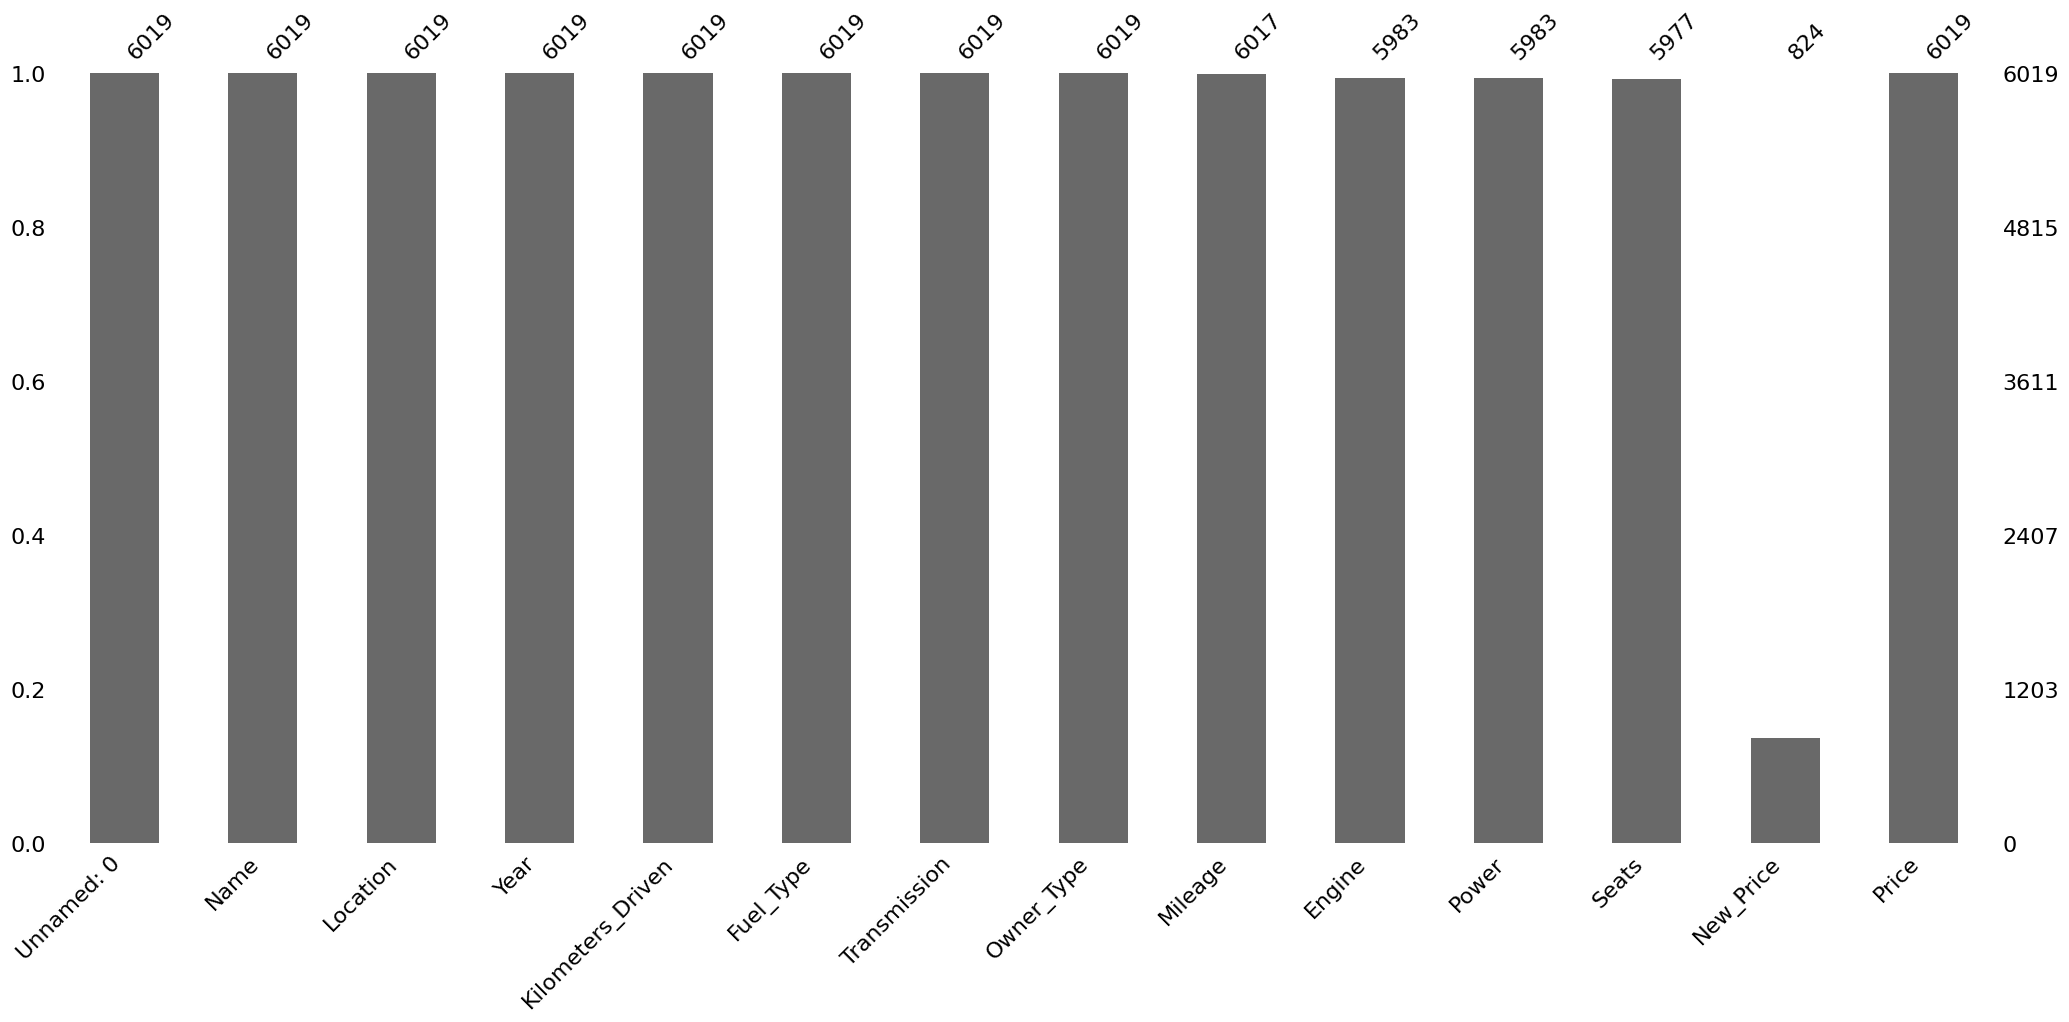

In [5]:
# missingno is a quick and easy way used to visualize missing values in the datasets
import missingno as msno
msno.bar(data)

**as the new_price column has many null values we are going to drop that column**

In [7]:
data = data.drop("New_Price", axis=1)
data.tail()

Unnamed: 0                      Name   Location  Year  \
6014        6014          Maruti Swift VDI      Delhi  2014   
6015        6015  Hyundai Xcent 1.1 CRDi S     Jaipur  2015   
6016        6016     Mahindra Xylo D4 BSIV     Jaipur  2012   
6017        6017        Maruti Wagon R VXI    Kolkata  2013   
6018        6018     Chevrolet Beat Diesel  Hyderabad  2011   

      Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
6014              27365    Diesel       Manual      First   28.4 kmpl   
6015             100000    Diesel       Manual      First   24.4 kmpl   
6016              55000    Diesel       Manual     Second   14.0 kmpl   
6017              46000    Petrol       Manual      First   18.9 kmpl   
6018              47000    Diesel       Manual      First  25.44 kmpl   

       Engine     Power  Seats  Price  
6014  1248 CC    74 bhp    5.0   4.75  
6015  1120 CC    71 bhp    5.0   4.00  
6016  2498 CC   112 bhp    8.0   2.90  
6017   998 CC  67.1 bhp    5.0   2.65  
6018   936 CC  57.6 bhp    5.0   2.50

In [8]:
# drop the remaining rows in the dataset with missing values
data = data.dropna()
data.isnull().sum()

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

## Test Train Split
* 70% as train data and 30% as test data
* training data is used to train the machine learning models and test data is used to check the accuracy of the model

In [9]:
dataFrame = data.iloc[:,:-1]
target = data.iloc[:,-1]

In [10]:
X_train, X_test, ytrain, ytest = train_test_split(dataFrame, target, test_size = 0.3, random_state = 8)
# iloc[:, :-1] selects the column except the last 
# iloc[:, -1] selects the last column

In [11]:
X_train

Unnamed: 0                                        Name    Location  \
322          322                      Maruti Swift Dzire VDi     Kolkata   
1540        1540  Hyundai Creta 1.6 SX Plus Dual Tone Petrol       Delhi   
829          829                         Toyota Etios Liva G      Mumbai   
4348        4348                     BMW 3 Series 320i Sedan     Kolkata   
3878        3878                  Mahindra XUV500 AT W10 FWD       Kochi   
...          ...                                         ...         ...   
2193        2193                         Volvo S60 D4 SUMMUM  Coimbatore   
2425        2425                 Ford Figo Diesel EXI Option     Chennai   
2043        2043                            Maruti Swift ZXI   Ahmedabad   
1371        1371                        Hyundai Verna 1.6 SX      Jaipur   
4582        4582                       Hyundai i20 1.2 Magna     Kolkata   

      Year  Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
322   2012              48000    Diesel       Manual      First   19.3 kmpl   
1540  2016              68000    Petrol       Manual      First  15.29 kmpl   
829   2012              29605    Petrol       Manual      First   18.3 kmpl   
4348  2011               7000    Petrol    Automatic      First  12.05 kmpl   
3878  2018              25948    Diesel    Automatic      First   16.0 kmpl   
...    ...                ...       ...          ...        ...         ...   
2193  2016              42259    Diesel    Automatic      First    9.0 kmpl   
2425  2012              72500    Diesel       Manual      First   18.5 kmpl   
2043  2015              40000    Petrol       Manual      First   20.4 kmpl   
1371  2012              65900    Diesel       Manual      First  22.32 kmpl   
4582  2011              36000    Petrol       Manual      First   18.5 kmpl   

       Engine       Power  Seats  
322   1248 CC    73.9 bhp    5.0  
1540  1591 CC   121.3 bhp    5.0  
829   1197 CC    null bhp    5.0  
4348  1995 CC     154 bhp    5.0  
3878  2179 CC     140 bhp    7.0  
...       ...         ...    ...  
2193  1984 CC     181 bhp    5.0  
2425  1399 CC      68 bhp    5.0  
2043  1197 CC   81.80 bhp    5.0  
1371  1582 CC  126.32 bhp    5.0  
4582  1197 CC      80 bhp    5.0  

[4182 rows x 12 columns]

In [12]:
# y_train holds the target training data to which the test model needs to be trained for better accuracy
ytrain

322      3.70
1540     9.85
829      2.44
4348     9.75
3878    16.46
        ...  
2193    24.36
2425     3.12
2043     5.90
1371     5.75
4582     2.50
Name: Price, Length: 4182, dtype: float64

## Pre-Processing and analyzing the data
* Let's explore the various columns and draw information about how useful each columns are

### Index

In [13]:
# The first column is the index(unnamed) for each data point and hence we can remove it.
X_train = X_train.iloc[:, 1:]
X_test = X_test.iloc[:, 1:]

In [15]:
# the index numbers aren't considered for the prediction
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4182 entries, 322 to 4582
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               4182 non-null   object 
 1   Location           4182 non-null   object 
 2   Year               4182 non-null   int64  
 3   Kilometers_Driven  4182 non-null   int64  
 4   Fuel_Type          4182 non-null   object 
 5   Transmission       4182 non-null   object 
 6   Owner_Type         4182 non-null   object 
 7   Mileage            4182 non-null   object 
 8   Engine             4182 non-null   object 
 9   Power              4182 non-null   object 
 10  Seats              4182 non-null   float64
dtypes: float64(1), int64(2), object(8)
memory usage: 392.1+ KB


### Name
**Let's explore the various cars in the dataset**

In [16]:
X_train["Name"].value_counts()

Mahindra XUV500 W8 2WD          36
Maruti Swift VDI                30
Maruti Swift VDI BSIV           26
Honda City 1.5 S MT             25
Maruti Ritz VDi                 23
                                ..
Mahindra Xylo H4                 1
Tata Indica V2 DL BSIII          1
Mitsubishi Lancer 1.5 SFXi       1
Maruti Wagon R LXI DUO BSIII     1
Ford Figo Diesel EXI Option      1
Name: Name, Length: 1564, dtype: int64

* we can say that there are several cars in the dataset, some of them with a count > 1
* the resale value of the car may also depend upon the manufacturers. So let's extract the manufacturer from this column and add it to the dataset.

#### from the test-train data we extract the manufactures' data

In [17]:
make_train = X_train["Name"].str.split(" ", expand = True)
make_test = X_test["Name"].str.split(" ", expand = True)
make_train[0]

322       Maruti
1540     Hyundai
829       Toyota
4348         BMW
3878    Mahindra
          ...   
2193       Volvo
2425        Ford
2043      Maruti
1371     Hyundai
4582     Hyundai
Name: 0, Length: 4182, dtype: object

In [18]:
# make_train[0] will have list of car names, using this data we create a new column manufacturers
X_train["Manufacturer"] = make_train[0]
X_test["Manufacturer"] = make_test[0]
X_train.sample(4)

Name   Location  Year  Kilometers_Driven  \
3362                   BMW X1 sDrive20d     Mumbai  2013              43000   
1788  Volkswagen Ameo 1.2 MPI Trendline      Kochi  2018              46007   
4977      Maruti Alto K10 2010-2014 VXI  Hyderabad  2011              81000   
4696                  Maruti Wagon R LX     Jaipur  2006             110000   

     Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
3362    Diesel    Automatic      First  17.05 kmpl  1995 CC    184 bhp    5.0   
1788    Petrol       Manual      First   17.0 kmpl  1198 CC  73.75 bhp    5.0   
4977    Petrol       Manual      First  20.92 kmpl   998 CC   67.1 bhp    5.0   
4696    Petrol       Manual      First   18.9 kmpl   998 CC   67.1 bhp    5.0   

     Manufacturer  
3362          BMW  
1788   Volkswagen  
4977       Maruti  
4696       Maruti

**Let's also confirm that there are no null values and identify all unique values**

Text(0, 0.5, 'Count of cars')

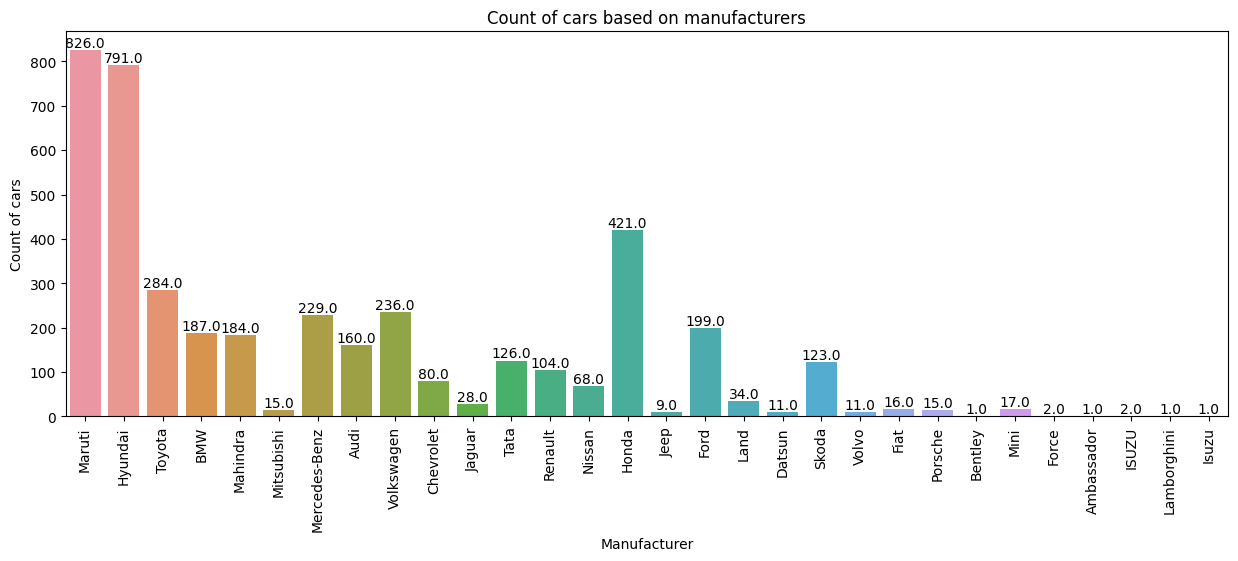

In [19]:
plt.figure(figsize = (15, 5))
plot = sns.countplot(x = 'Manufacturer', data = X_train, )

for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

# labels
plt.xticks(rotation = 90) 
plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

* from the above plot we can infer that Maximum cars in the dataset are by the manufactured **Maruti**
* Let's drop the `Name` column, as it's not required further in our prediction

In [20]:
X_train.drop("Name", axis = 1, inplace = True)
X_test.drop("Name", axis = 1, inplace = True)

X_train.sample(5)

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
4147      Kochi  2017              54758    Diesel       Manual      First   
3252  Hyderabad  2009             185200    Diesel       Manual      First   
2138      Delhi  2013              68000    Diesel       Manual      First   
464   Hyderabad  2013              76476    Petrol       Manual      First   
31        Delhi  2012              87615    Petrol       Manual      First   

         Mileage   Engine      Power  Seats Manufacturer  
4147   28.4 kmpl  1248 CC  73.75 bhp    5.0       Maruti  
3252   12.8 kmpl  2494 CC    102 bhp    8.0       Toyota  
2138  25.47 kmpl  1248 CC  88.50 bhp    7.0       Maruti  
464   16.47 kmpl  1198 CC   73.9 bhp    5.0   Volkswagen  
31    14.53 kmpl  1798 CC  138.1 bhp    5.0       Toyota

### Location

Location should not be a determinant for the price of a car and I'll safely remove it.

In [21]:
X_train.drop("Location", axis = 1, inplace = True)
X_test.drop("Location", axis = 1, inplace = True)

### Year

Year has no significance on its own unless we try to extract how old a car is from this and see how its resale price may get affected.

In [22]:
curr_time = datetime.datetime.now()
X_train['Year'] = X_train['Year'].apply(lambda x : curr_time.year - x)
X_test['Year'] = X_test['Year'].apply(lambda x : curr_time.year - x)

# as the price may vary with respect to the age of the car, so we calculate how much old the car is

X_train.sample(5)

Year  Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
1012     7              67489    Diesel       Manual      First  13.68 kmpl   
4277    11              37000    Diesel    Automatic      First   20.0 kmpl   
3471     8              45492    Diesel    Automatic      First   21.5 kmpl   
5346    11              63716    Diesel    Automatic      First  15.73 kmpl   
1432     7              25095    Petrol       Manual      First  18.16 kmpl   

       Engine       Power  Seats   Manufacturer  
1012  2393 CC   147.8 bhp    7.0         Toyota  
4277  2143 CC   107.3 bhp    5.0  Mercedes-Benz  
3471  1498 CC   108.5 bhp    5.0     Volkswagen  
5346  1968 CC  174.33 bhp    5.0           Audi  
1432  1196 CC    86.8 bhp    5.0           Ford

## Mileage

We need to extract the numerical value out of each string and save it in the column, as the units of the data aren't required fot our analysis

In [23]:
mileage_train = X_train["Mileage"].str.split(" ", expand = True)
mileage_test = X_test["Mileage"].str.split(" ", expand = True)

X_train["Mileage"] = pd.to_numeric(mileage_train[0], errors = 'coerce')
X_test["Mileage"] = pd.to_numeric(mileage_test[0], errors = 'coerce')
mileage_train[0] # consists of the value of mileage of the cars

322      19.3
1540    15.29
829      18.3
4348    12.05
3878     16.0
        ...  
2193      9.0
2425     18.5
2043     20.4
1371    22.32
4582     18.5
Name: 0, Length: 4182, dtype: object

Let's check for missing values.

In [24]:
print(sum(X_train["Mileage"].isnull()))
print(sum(X_test["Mileage"].isnull()))

0
0


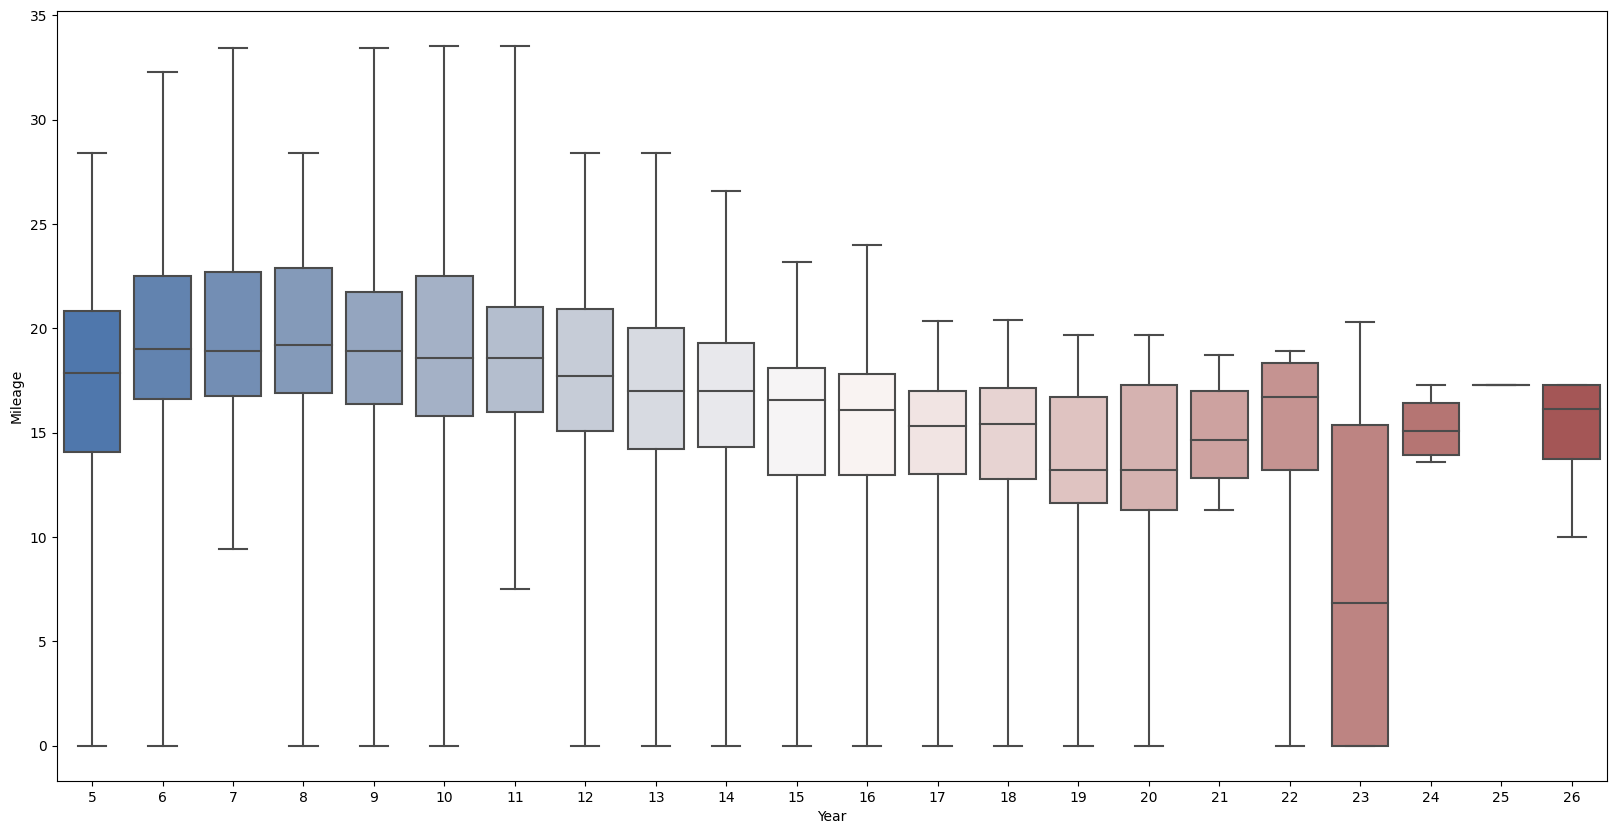

In [36]:
# Mileage vs age of the car
plt.figure(figsize=(20,10))
ml = X_train["Mileage"]
yr = X_train["Year"]
sns.boxplot(x=yr, y=ml,
            data=data,
            whis=[0, 100],
            width=.8,
            palette="vlag")

plt.show()

### Engine, Power and Seats
* Removing the units of the recorded data, as they aren't needed for our prediction
* The `Engine` values are defined in CC so I need to remove `CC` from the data. Similarly, `Power` has bhp, so remove `bhp` from it.

In [37]:
X_train.sample(5)

Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  \
51      10              52000    Diesel       Manual      First    22.90   
5878    10              37000    Petrol       Manual      First    18.90   
5815     6              37160    Diesel       Manual      First    22.77   
232     12              45000    Diesel       Manual      First    22.07   
3200    20              60000    Petrol       Manual     Second    17.30   

       Engine      Power  Seats Manufacturer  
51    1248 CC     74 bhp    5.0       Maruti  
5878  1197 CC     82 bhp    5.0      Hyundai  
5815  1498 CC  98.59 bhp    5.0         Ford  
232   1199 CC   73.9 bhp    5.0   Volkswagen  
3200  1061 CC     64 bhp    5.0       Maruti

In [38]:
# value of engine volume value is extracted, as we dont want the units
cc_train = X_train["Engine"].str.split(" ", expand = True)
cc_test = X_test["Engine"].str.split(" ", expand = True)

# now we convert the dataframe into series, and updating the engine column
X_train["Engine"] = pd.to_numeric(cc_train[0], errors = 'coerce')
X_test["Engine"] = pd.to_numeric(cc_test[0], errors = 'coerce')

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4182 entries, 322 to 4582
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               4182 non-null   int64  
 1   Kilometers_Driven  4182 non-null   int64  
 2   Fuel_Type          4182 non-null   object 
 3   Transmission       4182 non-null   object 
 4   Owner_Type         4182 non-null   object 
 5   Mileage            4182 non-null   float64
 6   Engine             4182 non-null   int64  
 7   Power              4182 non-null   object 
 8   Seats              4182 non-null   float64
 9   Manufacturer       4182 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 359.4+ KB


In [39]:
# similarly we do it for power column
bhp_train = X_train["Power"].str.split(" ", expand = True)
bhp_test = X_test["Power"].str.split(" ", expand = True)

X_train["Power"] = pd.to_numeric(bhp_train[0], errors = 'coerce')
X_test["Power"] = pd.to_numeric(bhp_test[0], errors = 'coerce')

X_train.head(3)

Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  \
322     12              48000    Diesel       Manual      First    19.30   
1540     8              68000    Petrol       Manual      First    15.29   
829     12              29605    Petrol       Manual      First    18.30   

      Engine  Power  Seats Manufacturer  
322     1248   73.9    5.0       Maruti  
1540    1591  121.3    5.0      Hyundai  
829     1197    NaN    5.0       Toyota

Now, filling the null values present in  `engine` , `power`, `seats`, columns with the mean of other data in the same column 

In [40]:
# filling the null valued data with the mean of other data in the same column
X_train["Engine"].fillna(X_train["Engine"].astype("float64").mean(), inplace = True)
X_test["Engine"].fillna(X_train["Engine"].astype("float64").mean(), inplace = True)

X_train["Power"].fillna(X_train["Power"].astype("float64").mean(), inplace = True)
X_test["Power"].fillna(X_train["Power"].astype("float64").mean(), inplace = True)

X_train["Seats"].fillna(X_train["Seats"].astype("float64").mean(), inplace = True)
X_test["Seats"].fillna(X_train["Seats"].astype("float64").mean(), inplace = True)

### Kilometers Driven

`Kilometers_Driven` is a numerical column with a certain range of values.

In [41]:
X_train["Kilometers_Driven"]

322     48000
1540    68000
829     29605
4348     7000
3878    25948
        ...  
2193    42259
2425    72500
2043    40000
1371    65900
4582    36000
Name: Kilometers_Driven, Length: 4182, dtype: int64

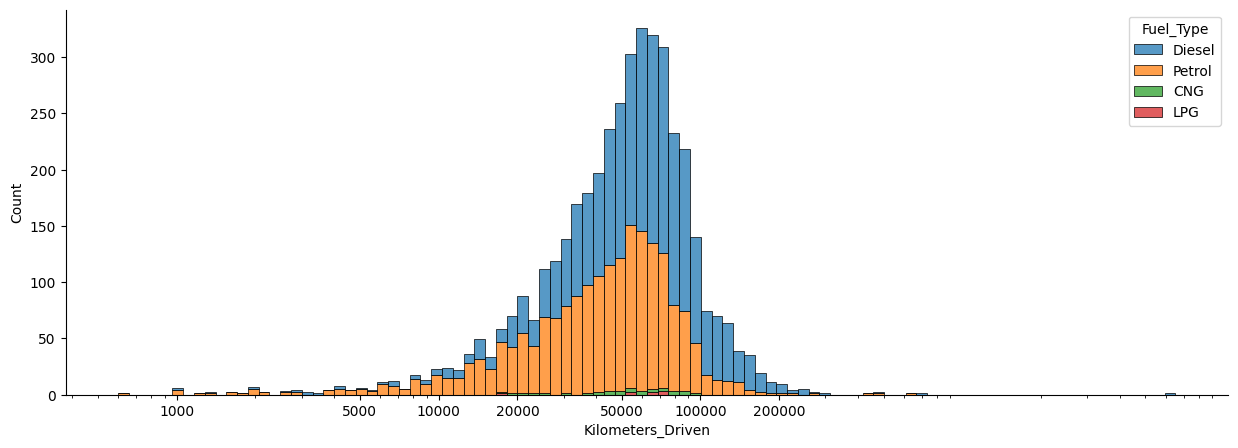

In [48]:
import matplotlib as mpl
kmd = X_train["Kilometers_Driven"]
ft = X_train["Fuel_Type"]
tr = X_train["Transmission"]

f, ax = plt.subplots(figsize=(15, 5))
sns.despine(f)

sns.histplot(
    X_train,
    x="Kilometers_Driven", hue="Fuel_Type",
    multiple="stack",
    linewidth=.5,
    log_scale=True,
)

ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([1000,5000,10000, 20000, 50000,100000, 200000])

plt.show()

* As the data range is really varied and the high values might affect prediction.
* thus, it is really important that scaling be applied to this column to make sure the data is balanced

## Data Processing

* Now that we have worked with the training data, let's create dummy columns for categorical columns using one-hot encoding before we begin training.
* **One hot encoding** is a technique that we use to represent **categorical variables as numerical values** in a machine learning model.

In [49]:
X_train.head(5)

Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  \
322     12              48000    Diesel       Manual      First    19.30   
1540     8              68000    Petrol       Manual      First    15.29   
829     12              29605    Petrol       Manual      First    18.30   
4348    13               7000    Petrol    Automatic      First    12.05   
3878     6              25948    Diesel    Automatic      First    16.00   

      Engine       Power  Seats Manufacturer  
322     1248   73.900000    5.0       Maruti  
1540    1591  121.300000    5.0      Hyundai  
829     1197  113.323091    5.0       Toyota  
4348    1995  154.000000    5.0          BMW  
3878    2179  140.000000    7.0     Mahindra

In [50]:
X_train = pd.get_dummies(X_train,
                         columns = ["Manufacturer", "Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True)
X_train.sample(5)

#the manufacturer column is categorized 

Year  Kilometers_Driven  Mileage  Engine   Power  Seats  \
4284     8              42000    11.36    2755  171.50    7.0   
2728     5              13574    21.40    1197   83.10    5.0   
3946     8              30000    26.59    1248   74.00    5.0   
3259     7              31000    18.51    1968  147.51    5.0   
284     12              54308    17.10    1591  121.30    5.0   

      Manufacturer_Audi  Manufacturer_BMW  Manufacturer_Bentley  \
4284                  0                 0                     0   
2728                  0                 0                     0   
3946                  0                 0                     0   
3259                  1                 0                     0   
284                   0                 0                     0   

      Manufacturer_Chevrolet  ...  Manufacturer_Toyota  \
4284                       0  ...                    1   
2728                       0  ...                    0   
3946                       0  ...                    0   
3259                       0  ...                    0   
284                        0  ...                    0   

      Manufacturer_Volkswagen  Manufacturer_Volvo  Fuel_Type_Diesel  \
4284                        0                   0                 1   
2728                        0                   0                 0   
3946                        0                   0                 1   
3259                        0                   0                 1   
284                         0                   0                 0   

      Fuel_Type_LPG  Fuel_Type_Petrol  Transmission_Manual  \
4284              0                 0                    0   
2728              0                 1                    0   
3946              0                 0                    1   
3259              0                 0                    0   
284               0                 1                    1   

      Owner_Type_Fourth & Above  Owner_Type_Second  Owner_Type_Third  
4284                          0                  0                 0  
2728                          0                  0                 0  
3946                          0                  0                 0  
3259                          0                  0                 0  
284                           0                  0                 0  

[5 rows x 42 columns]

In [51]:
presentData1 = [[10,91903,"Diesel","Automatic","First",17.68,1968,174.33,5.0,"Audi"]]
presentData1 = pd.DataFrame(presentData1)
presentData1.columns = ["Year","Kilometers_Driven","Fuel_Type","Transmission","Owner_Type","Mileage","Engine","Power","Seats","Manufacturer"]
presentData1

Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0    10              91903    Diesel    Automatic      First    17.68    1968   

    Power  Seats Manufacturer  
0  174.33    5.0         Audi

**lets create a custom dataset for model prediction**

In [52]:
#####
customData1 = [[8,50000,"Diesel","Automatic","First",21.10,1768,184.33,5.0,"Audi"]]
customData1 = pd.DataFrame(customData1)
customData1.columns = ["Year","Kilometers_Driven","Fuel_Type","Transmission","Owner_Type","Mileage","Engine","Power","Seats","Manufacturer"]
customData1

Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0     8              50000    Diesel    Automatic      First     21.1    1768   

    Power  Seats Manufacturer  
0  184.33    5.0         Audi

similarly we create the dummy columns for X_test data also

In [53]:
X_test.head(2)

Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  \
5895    20              94000    Petrol       Manual     Second     18.9   
5591    18             125000    Petrol       Manual     Second     13.5   

      Engine  Power  Seats Manufacturer  
5895     998   67.1    5.0       Maruti  
5591    1799  130.0    5.0        Honda

In [54]:
X_test = pd.get_dummies(X_test,
                         columns = ["Manufacturer", "Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True)
X_test.sample(5)

Year  Kilometers_Driven  Mileage  Engine       Power  Seats  \
3579    14              71000    16.10    1197   85.000000    5.0   
1471     9              22000    16.47    1198   74.000000    5.0   
2848    10              65694    18.90     998   67.100000    5.0   
631     22              70000     0.00    1086  113.323091    5.0   
2033     9             190000    16.78    1496   88.730000    5.0   

      Manufacturer_BMW  Manufacturer_Chevrolet  Manufacturer_Datsun  \
3579                 0                       0                    0   
1471                 0                       0                    0   
2848                 0                       0                    0   
631                  0                       0                    0   
2033                 0                       0                    0   

      Manufacturer_Fiat  ...  Manufacturer_Toyota  Manufacturer_Volkswagen  \
3579                  0  ...                    0                        0   
1471                  0  ...                    0                        1   
2848                  0  ...                    0                        0   
631                   0  ...                    0                        0   
2033                  0  ...                    1                        0   

      Manufacturer_Volvo  Fuel_Type_Diesel  Fuel_Type_LPG  Fuel_Type_Petrol  \
3579                   0                 0              0                 1   
1471                   0                 0              0                 1   
2848                   0                 0              0                 1   
631                    0                 0              0                 1   
2033                   0                 0              0                 1   

      Transmission_Manual  Owner_Type_Fourth & Above  Owner_Type_Second  \
3579                    1                          0                  0   
1471                    1                          0                  0   
2848                    1                          0                  0   
631                     1                          0                  0   
2033                    1                          0                  1   

      Owner_Type_Third  
3579                 0  
1471                 0  
2848                 0  
631                  1  
2033                 0  

[5 rows x 38 columns]

It might be possible that the dummy column creation would be different in test and train data, thus, I'd fill in all missing columns with zeros.

In [55]:
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

**creating missing columns for the presentData and customData for model prediction**

In [56]:
presentData1 = pd.get_dummies(presentData1,
                         columns = ["Manufacturer", "Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True)
presentData1

Year  Kilometers_Driven  Mileage  Engine   Power  Seats
0    10              91903    17.68    1968  174.33    5.0

In [57]:
ytrain.isnull().sum()

0

## Training and predicting

`Standardizing the data`
* StandardScaler is a preprocessing technique used in machine learning to standardize the features of a dataset, to ensure the data are in same scale for modeling
* its done by removing the mean and scales each variable to unit variance

In [58]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

* so now we will create a **Linear Regression** model and a **Random Forest** model to train on the data and use it for future predictions
* and compare the score of the two models

#### applying linear regression

In [65]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, ytrain)
y_pred = linearRegression.predict(X_test)
# r2_score is a measurement done to check the goodness and fit of the model
# like how well the regression data approximates the actual data
print(r2_score(ytest, y_pred))

0.7688512209356453


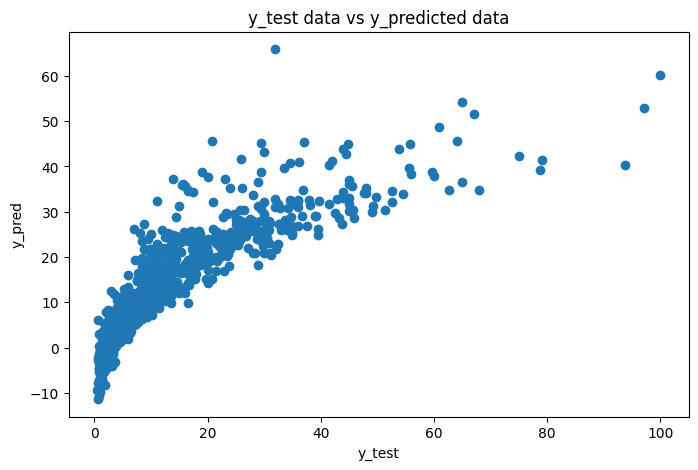

In [66]:
#plots and labels
plt.figure(figsize=(8,5))
plt.title("y_test data vs y_predicted data")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.scatter(ytest, y_pred)
plt.show()

The `Linear regression` model performed the best with a R2 score of approx **0.768**

#### applying random forest algorithm

In [63]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, ytrain)
y_pred = rf.predict(X_test)
print(r2_score(ytest, y_pred))

0.9090147433132967


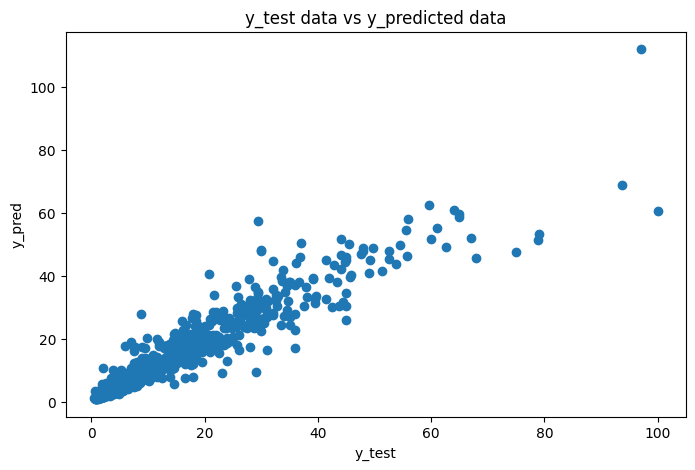

In [64]:
#plot and labels
plt.figure(figsize=(8,5))
plt.title("y_test data vs y_predicted data")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.scatter(ytest, y_pred)
plt.show()

The `Random Forest` model performed the best with a R2 score of approx **0.909**.